# Introduction

This analysis investigates the factors influencing sleep efficiency across different variables in the dataset. Sleep efficiency, defined as the ratio of actual sleep time to the total time spent in bed, is an important measure of sleep quality. Understanding the factors that affect sleep efficiency can provide valuable insights into improving sleep habits and overall well-being.

In this notebook, we will explore various aspects of the dataset, focusing on key variables such as bedtime, exercise frequency, and deep sleep percentage, etc., to examine their impact on sleep efficiency. Through both descriptive and inferential statistical techniques, we will assess the relationships and differences between groups in terms of their sleep efficiency levels.

##Data Loading and Overview

Firstly, import the major python packages needed for the analyses:

- Pandas
- NumPy
- Matplotlib
- Seaborn

We may need to import more specific statistical tools from SciPy on a need-based level later on.

In [128]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#use pandas to read csv file

df = pd.read_csv('Sleep_Efficiency.csv')

##Basic Diagnostics

In [4]:
#first five rows

df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [5]:
#general info about the dataset

df.info()

#from initial screening, there seems to be a few null values for 'Awakenings',
#'Caffeine consumption', 'Exercise frequency', and 'Alcohol consumption' columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [6]:
#some statistics for the columns that are numerical features

df.describe()

#nothing particularly out of the ordinary upon initial scanning

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


##Data Cleaning and Null Value Imputation

In [7]:
#identify the number of null values in each column

df.isna().sum()

,0
ID,0
Age,0
Gender,0
Bedtime,0
Wakeup time,0
Sleep duration,0
Sleep efficiency,0
REM sleep percentage,0
Deep sleep percentage,0
Light sleep percentage,0


It is definitely not appropriate to use 0 for the null values in the 'Awakenings' column, as 0 awakenings is a meaningful value in this case.

In this case, median imputation or mode imputation are likely the most appropriate and robust choices. Median imputation method avoids the influence of outliers and gives a good approximation for most cases. Mode imputation might also viable based on the distribution, whether it is spread out across multiple values or not will be the deciding factor.

In [8]:
#identify mode
value_counts = df['Awakenings'].value_counts()
print(value_counts)

Awakenings
1.0    154
0.0     95
3.0     63
4.0     63
2.0     57
Name: count, dtype: int64


In [9]:
#identify median
median = df['Awakenings'].median()
median

1.0

Luckily, both median and mode come out to be 1.0, so the null values of the 'Awakenings' column will be filled in with 1.0.

In [10]:
df['Awakenings'] = df['Awakenings'].fillna('1.0')
df.isna().sum()

,0
ID,0
Age,0
Gender,0
Bedtime,0
Wakeup time,0
Sleep duration,0
Sleep efficiency,0
REM sleep percentage,0
Deep sleep percentage,0
Light sleep percentage,0


In [11]:
#since there doesn't seem to be actual decimal points, we can remove the decimals and make them into integers for more convenient use.
df['Awakenings'].unique()

array([0.0, 3.0, 1.0, 2.0, 4.0, '1.0'], dtype=object)

In [12]:
df['Awakenings'] = pd.to_numeric(df['Awakenings'], errors='coerce')
df['Awakenings'] = df['Awakenings'].round().astype(int)
df['Awakenings']

,Awakenings
0,0
1,3
2,1
3,3
4,3
...,...
447,0
448,4
449,1
450,3


In [13]:
df['Alcohol consumption'].value_counts()

,count
Alcohol consumption,
0.0,246
1.0,54
3.0,48
2.0,37
5.0,30
4.0,23


Based on the frequency of values (0.0 being most frequent), mode imputation seems like the best and simplest choice in this case. Since most of the data represents no alcohol consumption, imputing the missing values with 0.0 is likely a reasonable and unbiased choice.

In [14]:
df['Alcohol consumption'] = df['Alcohol consumption'].fillna('0.0')
df.isna().sum()

,0
ID,0
Age,0
Gender,0
Bedtime,0
Wakeup time,0
Sleep duration,0
Sleep efficiency,0
REM sleep percentage,0
Deep sleep percentage,0
Light sleep percentage,0


In [15]:
#change 'Alcohol consumption' values into integers as well
df['Alcohol consumption'] = pd.to_numeric(df['Alcohol consumption'], errors='coerce')
df['Alcohol consumption'] = df['Alcohol consumption'].round().astype(int)
df['Alcohol consumption']

,Alcohol consumption
0,0
1,3
2,0
3,5
4,3
...,...
447,0
448,0
449,3
450,0


In [16]:
df['Caffeine consumption'].value_counts()

,count
Caffeine consumption,
0.0,211
50.0,107
25.0,79
75.0,25
200.0,4
100.0,1


To avoid heavily skewing the imputation towards 0.0 caffeine consumption, it would likely be better to use median imputation to fill in the null values in the 'Caffeine consumption' column.

In [17]:
#directly fill nulls with median of the 'Caffeine consumption' column
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].median())
df['Caffeine consumption']

,Caffeine consumption
0,0.0
1,0.0
2,0.0
3,50.0
4,0.0
...,...
447,0.0
448,25.0
449,25.0
450,0.0


In [18]:
#same deal with removing decimal and turning values in the column to integers for easier future use.

df['Caffeine consumption'] = pd.to_numeric(df['Caffeine consumption'], errors='coerce')
df['Caffeine consumption'] = df['Caffeine consumption'].round().astype(int)
df['Caffeine consumption']

,Caffeine consumption
0,0
1,0
2,0
3,50
4,0
...,...
447,0
448,25
449,25
450,0


In [19]:
df['Exercise frequency'].value_counts()

,count
Exercise frequency,
3.0,130
0.0,116
1.0,97
2.0,54
4.0,41
5.0,8


Mode imputation is the most natural choice for the 6 'Exercies frequency' column, since 3.0 is the most frequent value, and the null values are likely to represent a similar pattern of exercise frequency.

In [20]:
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].mode()[0])
df['Exercise frequency']

,Exercise frequency
0,3.0
1,3.0
2,3.0
3,1.0
4,3.0
...,...
447,5.0
448,3.0
449,0.0
450,3.0


In [21]:
df.isna().sum()
#finally null value free!

,0
ID,0
Age,0
Gender,0
Bedtime,0
Wakeup time,0
Sleep duration,0
Sleep efficiency,0
REM sleep percentage,0
Deep sleep percentage,0
Light sleep percentage,0


In [22]:
df['Exercise frequency'] = pd.to_numeric(df['Exercise frequency'], errors='coerce')
df['Exercise frequency'] = df['Exercise frequency'].round().astype(int)
df['Exercise frequency']

,Exercise frequency
0,3
1,3
2,3
3,1
4,3
...,...
447,5
448,3
449,0
450,3


In [23]:
#rename these two columns to include units
df = df.rename(columns={'Alcohol consumption': 'Alcohol Consumption (oz)'})
df = df.rename(columns={'Caffeine consumption': 'Caffeine Consumption (mg)'})
df = df.rename(columns={'Sleep duration': 'Sleep Duration'})

The dataframe should now be ready for descriptive analyses!

#Descriptive Analyses

###How many male and females are represented in this dataset?

<ipython-input-118-0a6c306ad297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Gender', palette='RdBu')


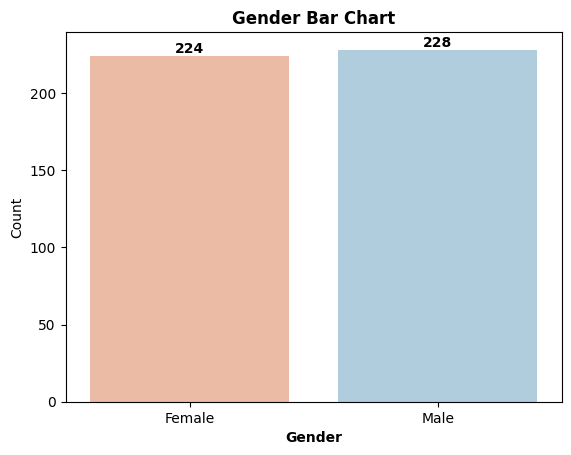

In [118]:
#create a countplot to represent number of each gender

ax = sns.countplot(data=df, x='Gender', palette='RdBu')
plt.title('Gender Bar Chart', fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height, int(height), ha='center', va='bottom', color='black', fontweight='bold')

###What is the distribution of age?

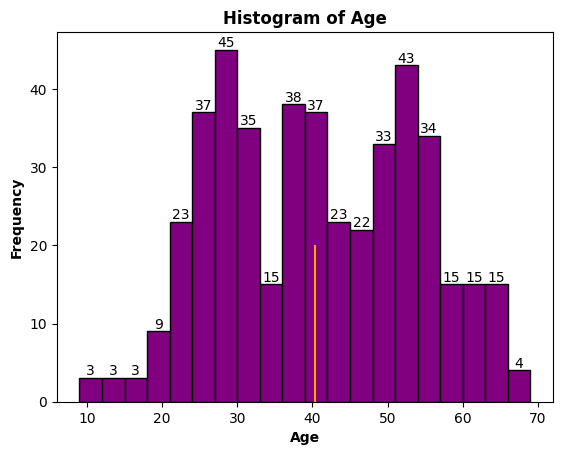

In [110]:
#use matplotlib to create histogram
#make it into a function so any column's distribution can be created into a histogram

def plot_histogram(data, column, color, bins):
  mean = data[column].mean()
  plt.hist(data[column], bins=bins, color = color, edgecolor='black')
  plt.title(f"Histogram of {column}", fontweight='bold')
  plt.xlabel(column, fontweight='bold')
  plt.ylabel('Frequency', fontweight='bold')
  plt.vlines(mean, ymin=0, ymax=20, color='orange')
  ax = plt.gca()
  for rect in ax.patches:
    height = rect.get_height()
    x_position = rect.get_x() + rect.get_width() / 2
    plt.text(x_position, height, str(int(height)), ha='center', va='bottom')

plot_histogram(df, 'Age', 'purple', 20)

In [120]:
#how many individuals fall between the 25-60 age range?

age_filtered = df[(df['Age'] >= 25) & (df['Age'] <= 60)]
age_filtered.shape[0]

365

In [121]:
df['Age'].mean()

40.2853982300885

###What is the distribution of sleep duration?

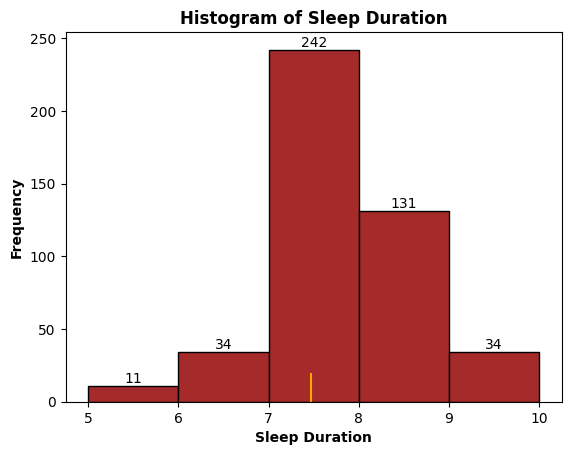

In [111]:
plot_histogram(df, 'Sleep Duration', 'brown', 5)

###What is the distribution of sleep efficiency?

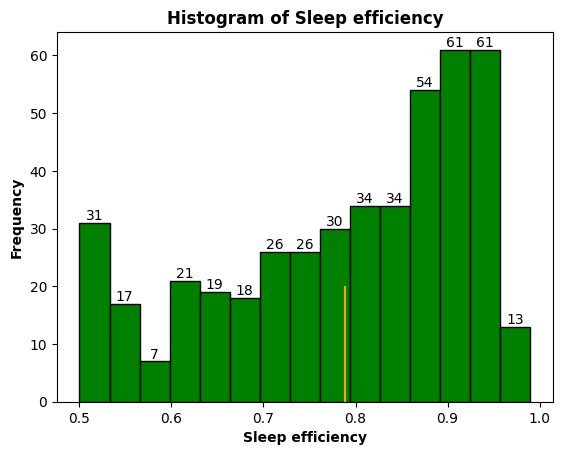

In [112]:
plot_histogram(df, 'Sleep efficiency', 'green', 15)

###Any correlation between the columns with numerical values?

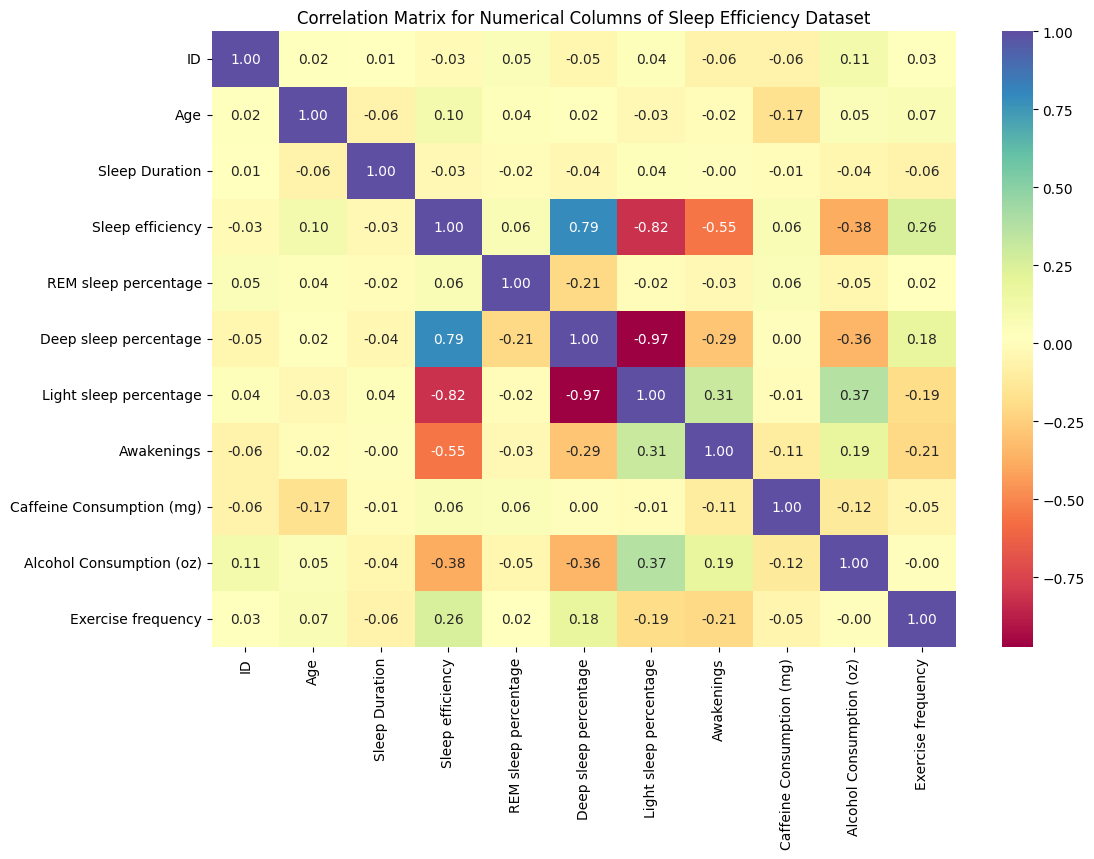

In [27]:
#create a correlation matrix

num_df = df.select_dtypes(include=[np.number])

matrix = num_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Matrix for Numerical Columns of Sleep Efficiency Dataset')
plt.show()

Noteworthy observations and interpretations:

- Deep sleep percentage and sleep efficiency have a strong positive correlation, hinting that higher deep sleep percentage indicates higher sleep efficiency.
- Deep sleep percentage and light sleep percentage have a very strong negative correlation, as they are essentially mutually exclusive.
- Awakenings and sleep efficiency have a moderate negative correlation, possibly due to sleep efficiency decreasing as a result of more awakenings.

<Axes: xlabel='Deep sleep percentage', ylabel='Sleep efficiency'>

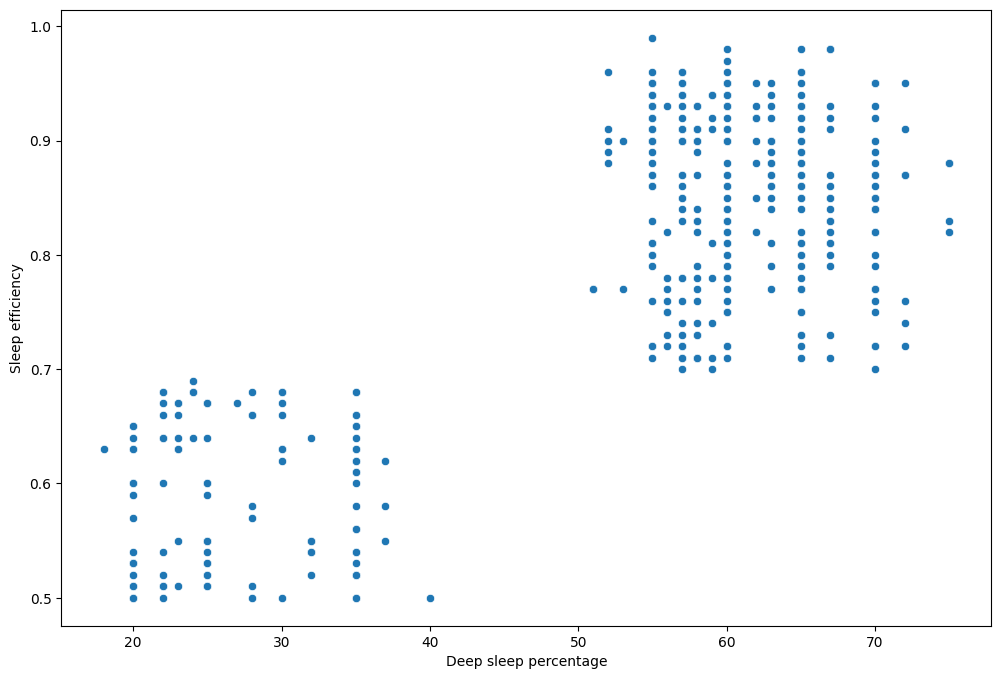

In [28]:
plt.figure(figsize=(12,8))

sns.scatterplot(data = df, x = 'Deep sleep percentage', y = 'Sleep efficiency')

Very interesting spread on this scatter plot. There seems to be two big clusters on the bottom left and top right of the graph. Nevertheless, there seems to be strong correlation betwen the two variables.

###How does smoking affect sleep efficiency?

<ipython-input-88-862d6161fe38>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Smoking status', y= 'Sleep efficiency', palette='RdBu')


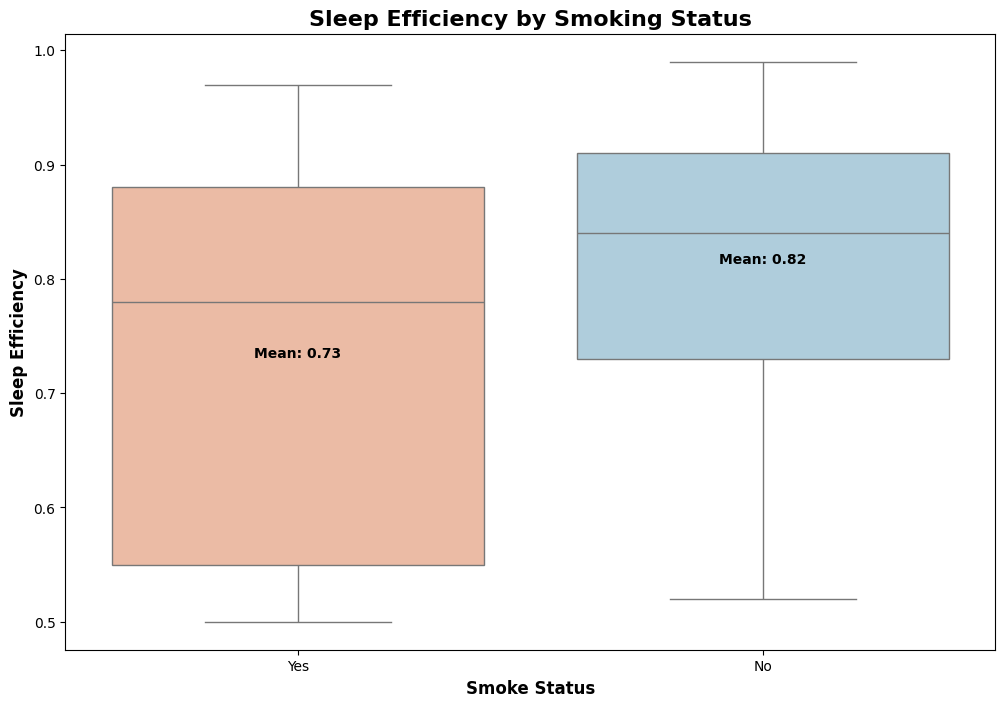

In [88]:
plt.figure(figsize=(12,8))

ax = sns.boxplot(data=df, x='Smoking status', y= 'Sleep efficiency', palette='RdBu')
plt.title('Sleep Efficiency by Smoking Status', fontweight = 'bold', fontsize = 16)
plt.xlabel('Smoke Status', fontweight='bold', fontsize = 12)
plt.ylabel('Sleep Efficiency', fontweight='bold', fontsize = 12)

means = df.groupby('Smoking status')['Sleep efficiency'].mean()

for i, category in enumerate(df['Smoking status'].unique()):
    mean_value = means[category]
    x_position = i
    ax.text(x_position, mean_value, f'Mean: {mean_value:.2f}',
            horizontalalignment='center', verticalalignment='center',
            color='black', fontweight='bold')

###What does alcohol consumption and caffiene consumption affect on sleep efficiency?

<ipython-input-83-9a759eac54a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Alcohol Consumption (oz)', y= 'Sleep efficiency', palette ='YlOrBr')


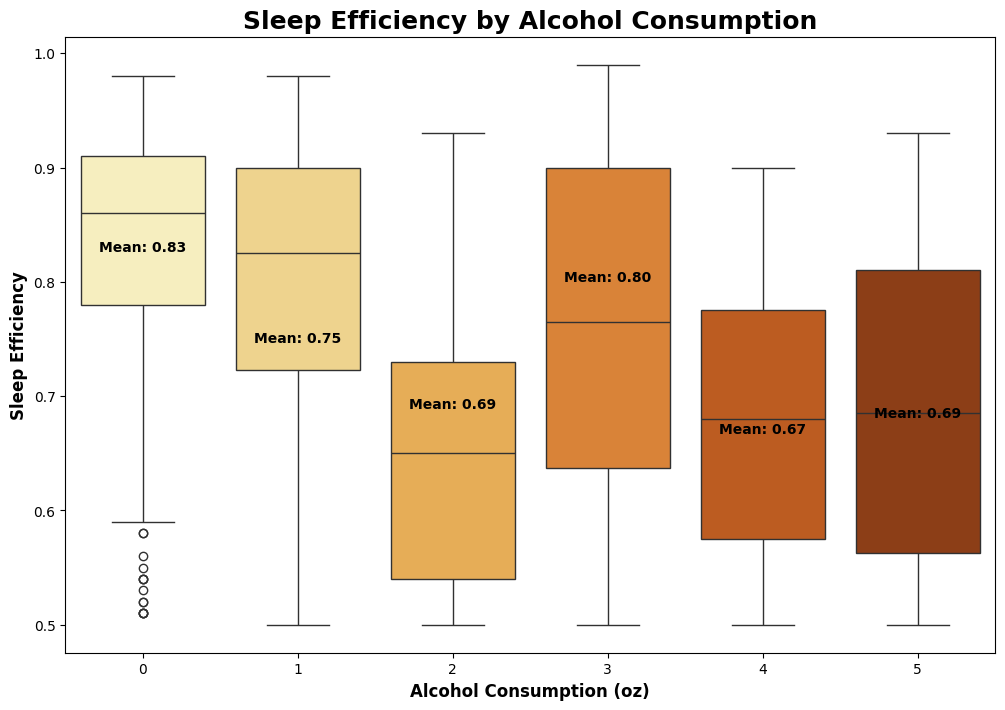

In [83]:
plt.figure(figsize=(12,8))

ax = sns.boxplot(data=df, x='Alcohol Consumption (oz)', y= 'Sleep efficiency', palette ='YlOrBr')
plt.title('Sleep Efficiency by Alcohol Consumption', fontweight = 'bold', fontsize=18)
plt.ylabel('Sleep Efficiency',fontweight='bold', fontsize=12)
plt.xlabel('Alcohol Consumption (oz)', fontweight='bold', fontsize=12)

means = df.groupby('Alcohol Consumption (oz)')['Sleep efficiency'].mean()

for i, category in enumerate(df['Alcohol Consumption (oz)'].unique()):
    mean_value = means[category]
    x_position = i
    ax.text(x_position, mean_value, f'Mean: {mean_value:.2f}',
            horizontalalignment='center', verticalalignment='center',
            color='black', fontweight='bold')

###How is sleep efficiency different between younger (0-40) and older (40+) individuals?

In [31]:
df_old = df[df['Age'] > 40]
df_young = df[df['Age'] < 40]

<ipython-input-32-390524dbd941>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='Sleep efficiency', data=df, palette='Set2')


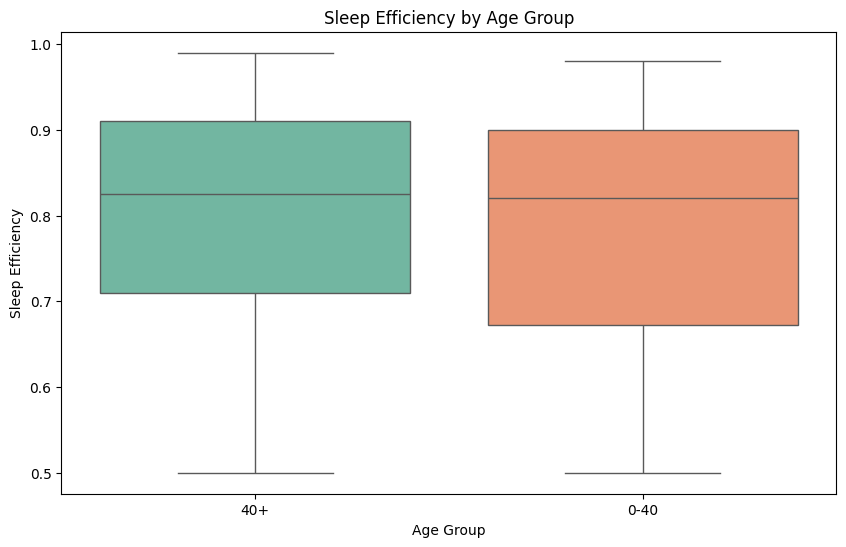

In [32]:
df['Age Group'] = df['Age'].apply(lambda x: '0-40' if x < 40 else '40+')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Sleep efficiency', data=df, palette='Set2')

# Title and labels
plt.title('Sleep Efficiency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sleep Efficiency')

# Show the plot
plt.show()

<ipython-input-33-21b840cd0ab6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exercise frequency', y= 'Awakenings', palette ='GnBu')


Text(0, 0.5, 'Awakenings')

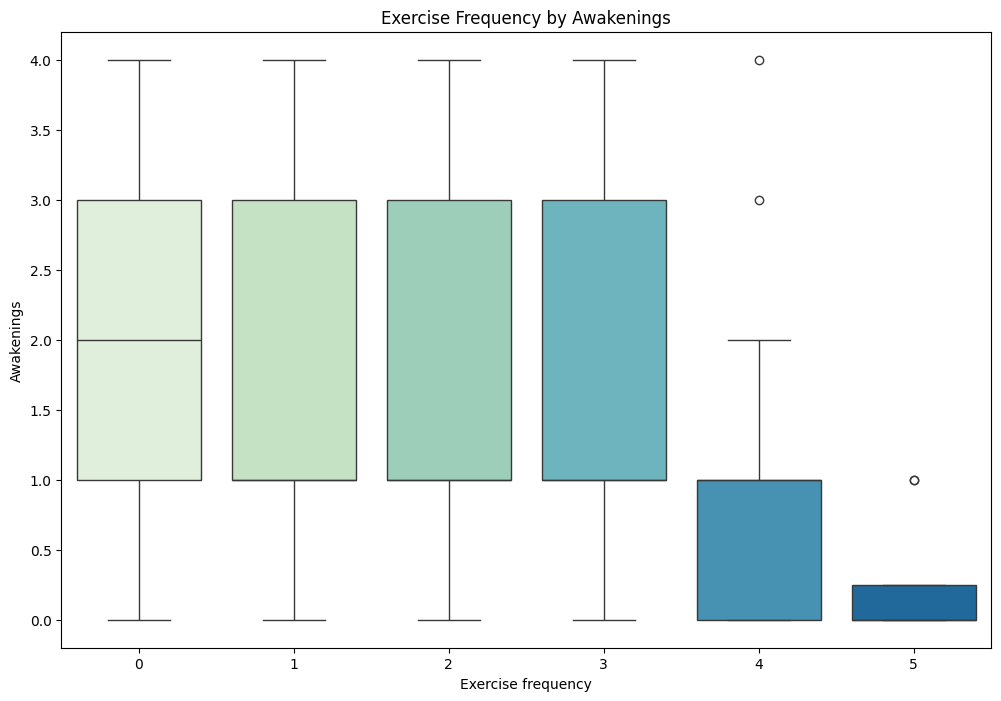

In [33]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, x='Exercise frequency', y= 'Awakenings', palette ='GnBu')
plt.title('Exercise Frequency by Awakenings')
plt.ylabel('Awakenings')

Graph generally shows the more frequently you exercise, the less awakenings that are likely to occur.

###How does bedtime affect sleep efficiency?

In [34]:
#I want to split it into two groups, those who sleep before midnight and those who sleep after midnight

#convert column to datetime
df['Bedtime'] = pd.to_datetime(df['Bedtime'])

#extract the time part from the 'Bedtime' column
df['Bedtime_time'] = df['Bedtime'].dt.time

#condition to find people who sleep before midnight (12:00:00 to 23:59:59)
before_midnight = df[(df['Bedtime_time'] >= pd.to_datetime('12:00:00').time()) &
                     (df['Bedtime_time'] <= pd.to_datetime('23:59:59').time())]

#condition to find people who sleep after midnight (00:00:00 to 11:59:59)
after_midnight = df[(df['Bedtime_time'] >= pd.to_datetime('00:00:00').time()) &
                    (df['Bedtime_time'] < pd.to_datetime('12:00:00').time())]

#display the results
before_midnight

,ID,Age,Gender,Bedtime,Wakeup time,Sleep Duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine Consumption (mg),Alcohol Consumption (oz),Smoking status,Exercise frequency,Age Group,Bedtime_time
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1,0,0,No,3,40+,21:30:00
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0,25,0,No,1,0-40,21:00:00
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2,50,0,Yes,1,0-40,21:00:00
11,12,55,Male,2021-03-10 22:30:00,2021-03-10 06:00:00,7.5,0.93,18,60,22,0,0,0,No,3,40+,22:30:00
15,16,32,Female,2021-12-06 22:00:00,2021-12-06 05:30:00,7.5,0.92,25,55,20,0,50,2,No,5,0-40,22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,4,50,2,Yes,1,0-40,23:00:00
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0,0,0,No,5,0-40,22:00:00
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4,25,0,No,3,40+,21:00:00
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1,25,3,Yes,0,40+,23:00:00


<ipython-input-63-8c378d1b36ee>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Bedtime Category', y='Sleep efficiency', data=df,
<ipython-input-63-8c378d1b36ee>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Bedtime Category')['Sleep efficiency'].mean()


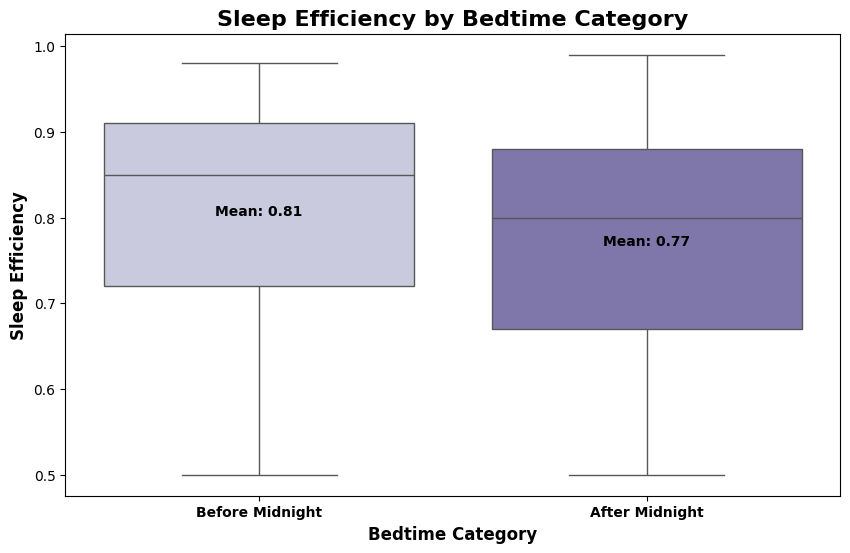

In [63]:
#now let's make it into a boxplot

df['Bedtime Category'] = pd.cut(df['Bedtime_time'],
                                bins=[pd.to_datetime('00:00:00').time(),
                                      pd.to_datetime('11:59:59').time(),
                                      pd.to_datetime('23:59:59').time()],
                                labels=['After Midnight', 'Before Midnight'],
                                right=False)

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Bedtime Category', y='Sleep efficiency', data=df,
                 palette='Purples', order=['Before Midnight', 'After Midnight'])

plt.title('Sleep Efficiency by Bedtime Category', fontweight='bold', fontsize=16)
plt.xlabel('Bedtime Category', fontsize=12, fontweight='bold')
plt.ylabel('Sleep Efficiency', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')

means = df.groupby('Bedtime Category')['Sleep efficiency'].mean()

for i, category in enumerate(['Before Midnight', 'After Midnight']):
    mean_value = means[category]
    x_position = i
    ax.text(x_position, mean_value, f'Mean: {mean_value:.2f}', horizontalalignment='center', verticalalignment='center', color='black', fontweight='bold')

In [91]:
len(after_midnight)

241

#Inferential Analyses

##Do individuals who sleep before midnight have higher sleep efficiency compared to those who sleep after midnight?

Before we can do any sort of parametric or non-parametric statistical hypothesis tests, it is important to identify if the distributions are normal.

In [54]:
before_midnight

,Sleep efficiency
2,0.89
5,0.90
6,0.54
11,0.93
15,0.92
...,...
445,0.53
447,0.91
448,0.74
449,0.55


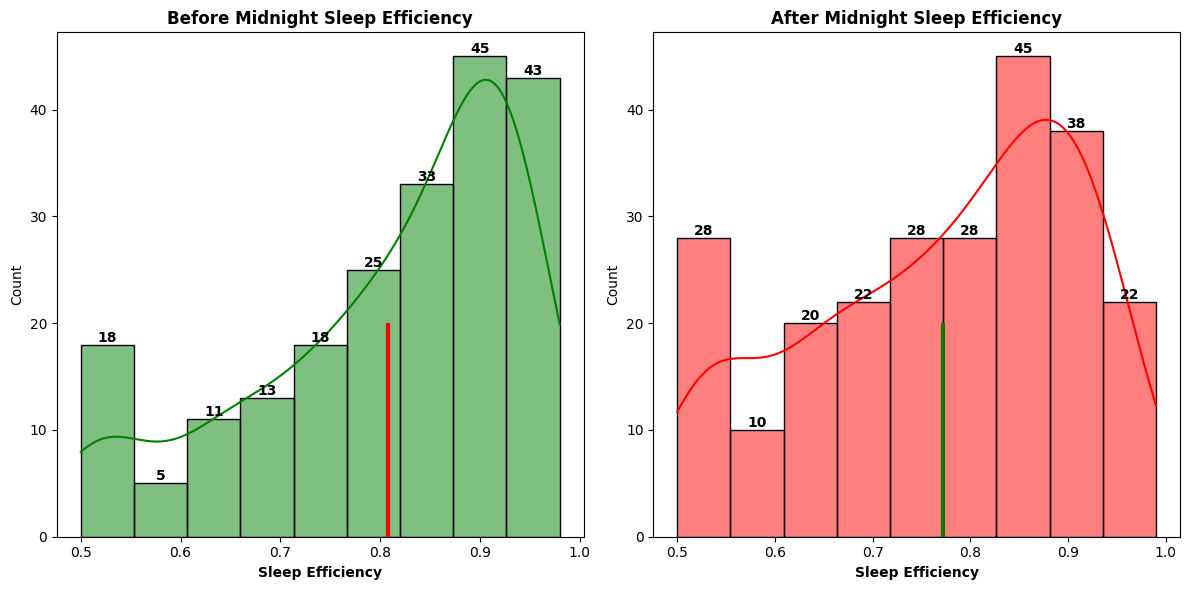

In [109]:
#use a histogram to somewhat visualize normality

plt.figure(figsize=(12, 6))

before_mean = before_midnight.mean()
plt.subplot(1, 2, 1)
ax1 = sns.histplot(before_midnight, kde=True, color='green')
plt.title('Before Midnight Sleep Efficiency', fontweight='bold')
plt.xlabel('Sleep Efficiency', fontweight='bold')
plt.vlines(before_mean, ymin=0, ymax=20, color='red', linewidth=3)
for p in ax1.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax1.text(x_position, height, int(height), ha='center', va='bottom', color='black', fontweight='bold')


after_mean = after_midnight.mean()
plt.subplot(1, 2, 2)
ax2 = sns.histplot(after_midnight, kde=True, color='red')
plt.title('After Midnight Sleep Efficiency', fontweight='bold')
plt.xlabel('Sleep Efficiency', fontweight='bold')
plt.vlines(after_mean, ymin=0, ymax=20, color='green', linewidth=3)
for p in ax2.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax2.text(x_position, height, int(height), ha='center', va='bottom', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

In [37]:
#perform a shapiro-wilk test for normality

from scipy.stats import shapiro

before_midnight = df[df['Bedtime Category'] == 'Before Midnight']['Sleep efficiency']
after_midnight = df[df['Bedtime Category'] == 'After Midnight']['Sleep efficiency']

before_midnight_stat, before_midnight_p = shapiro(before_midnight)
after_midnight_stat, after_midnight_p = shapiro(after_midnight)

print('stat=%.3f, p=%.3f' % (before_midnight_stat, before_midnight_p))
if before_midnight_p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.886, p=0.000
Probably not Gaussian


Probably not Gaussian means it is most likely not normally distributed!

###Step #0: Get a feel for the direction we're going in:

<ipython-input-38-4f28763f7d78>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='Sleep efficiency', x='Bedtime Category', palette = 'GnBu',


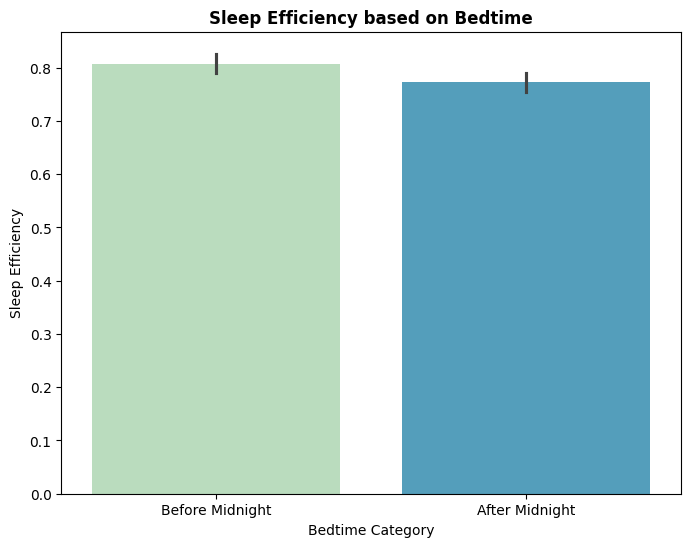

In [38]:
plt.figure(figsize=(8,6))

sns.barplot(data=df, y='Sleep efficiency', x='Bedtime Category', palette = 'GnBu',
            order=['Before Midnight', 'After Midnight'])
plt.title('Sleep Efficiency based on Bedtime', fontweight='bold')
plt.ylabel('Sleep Efficiency')
plt.show()

###Step #1: State the Hypothesis.

Null hypothesis (H₀): There is no significant difference in the sleep efficiency between people who sleep before midnight and those who sleep after midnight.

Alternative hypothesis (H₁): People who sleep before midnight have higher sleep efficiency than those who sleep after midnight.

###Step #2: Identify the Test Statistic and its Probability Distribution.

A large enough sample size is present:

N = 452

The subsamples are both also large enough:

Before midnight = 211

After midnight = 241

We do not know population paramters. Additionally, Shapiro-Wilk test revealed the distributions are most likely not normally distributed, ruling out parametric hypothesis tests.

With all aspects considered, Mann-Whitney U Test is the most fitting hypothesis test.

###Step #3: Specify the Significance Level.

$\alpha$ = 0.05

In [39]:
alpha = 0.05

###Step #4: State the Decision Rule.

In [40]:
def interpret_hypothesis_test(p_value, alpha):
    if p_value < alpha:
        print("Testing has concluded in a SUCCESSFUL REJECTION OF THE NULL HYPOTHESIS.")
        print("\t –> `θ ≠ θ₀`")
        print("\nEvidence has been found to suggest that there is a statistical difference in sleep efficiency between those who sleep before and after midnight.")
    else:
        print("Testing has concluded in a FAILURE TO REJECT THE NULL HYPOTHESIS.")
        print("\t –> `θ = θ₀`")
        print("\nNo evidence has been found at this time to suggest that there is statistical difference in sleep efficiency between those who sleep before and after midnight.")

###Step #5: Collect Data and Calculate the Test Statistic.

In [41]:
#prepare data

before_midnight = df[df['Bedtime Category'] == 'Before Midnight']['Sleep efficiency']
after_midnight = df[df['Bedtime Category'] == 'After Midnight']['Sleep efficiency']

#import appropriate scipy.stats test suite

import scipy.stats as stats
stat, p_value = stats.mannwhitneyu(before_midnight, after_midnight)
print('stat=%.3f, p=%.10f' % (stat, p_value))

stat=29633.000, p=0.0023813114


###Step #6: Make the Statistical Decision.

In [42]:
interpret_hypothesis_test(p_value=p_value, alpha=alpha)

Testing has concluded in a SUCCESSFUL REJECTION OF THE NULL HYPOTHESIS.
	 –> `θ ≠ θ₀`

Evidence has been found to suggest that there is a statistical difference in sleep efficiency between those who sleep before and after midnight.


##Does exercise frequency have an effect on sleep efficiency?

Before we can do any sort of parametric or non-parametric statistical hypothesis tests, it is important to identify if the distributions are normal.

In [43]:
exercise_groups = [df[df['Exercise frequency'] == level]['Sleep efficiency'] for level in [0, 1, 2, 3, 4, 5]]

In [44]:
for i, group in enumerate(exercise_groups, 0):
    stat, p_value = shapiro(group)
    if p_value > 0.05:
	    print(f"Shapiro-Wilk Test for Exercise Frequency: {i} is Probably Gaussian")
    else:
	    print(f"Shapiro-Wilk Test for Exercise Frequency: {i} is Probably not Gaussian")


Shapiro-Wilk Test for Exercise Frequency: 0 is Probably not Gaussian
Shapiro-Wilk Test for Exercise Frequency: 1 is Probably not Gaussian
Shapiro-Wilk Test for Exercise Frequency: 2 is Probably not Gaussian
Shapiro-Wilk Test for Exercise Frequency: 3 is Probably not Gaussian
Shapiro-Wilk Test for Exercise Frequency: 4 is Probably not Gaussian
Shapiro-Wilk Test for Exercise Frequency: 5 is Probably not Gaussian


Based on the Shapiro-Wilk test, it seems that none of the distributions are normal.

###Step #0: Get a feel for the direction we're going in:

<ipython-input-125-f08f1a3d4f19>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, y='Sleep efficiency', x='Exercise frequency', palette = 'Purples')


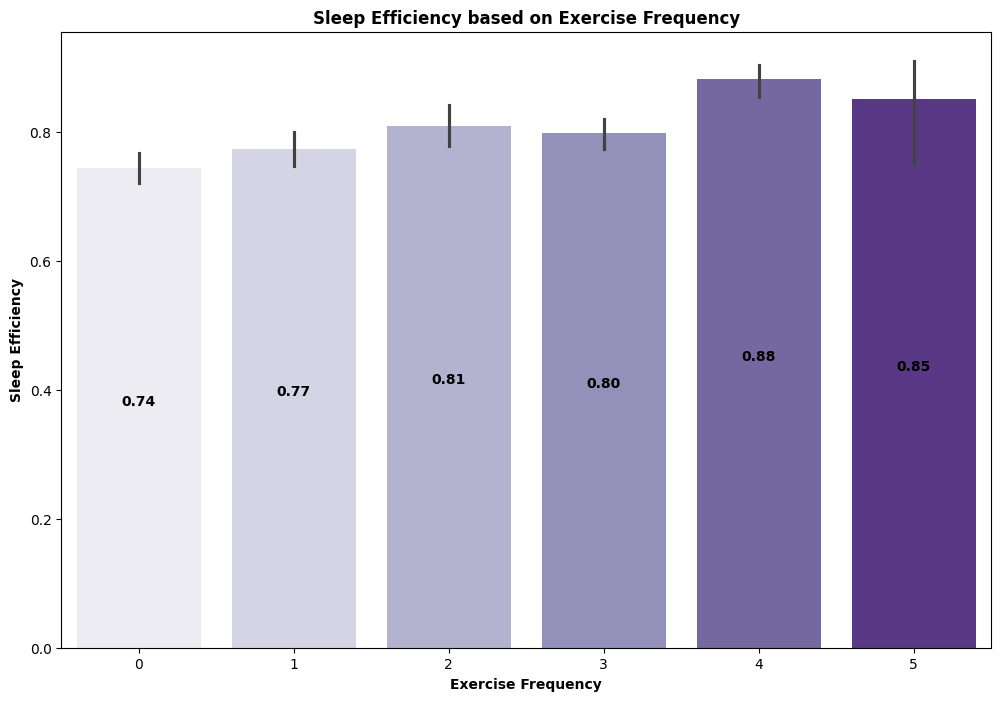

In [125]:
plt.figure(figsize=(12,8))

ax = sns.barplot(data=df, y='Sleep efficiency', x='Exercise frequency', palette = 'Purples')
plt.title('Sleep Efficiency based on Exercise Frequency', fontweight = 'bold')
plt.xlabel('Exercise Frequency', fontweight='bold')
plt.ylabel('Sleep Efficiency', fontweight='bold')

for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height/2, f'{height:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

###Step #1: State the Hypothesis.

Null Hypothesis (H₀): The distribution of sleep efficiency is the same across all levels of exercise frequency (i.e., there is no difference in sleep efficiency between the groups).

Alternative Hypothesis (H₁): At least one level of exercise frequency has a different distribution of sleep efficiency (i.e., at least one group differs from the others in terms of sleep efficiency).


###Step #2: Identify the Test Statistic and its Probability Distribution.

A large enough sample size is present as N≥30:

N = 452

The subsamples are both also large enough ≥ 5:

Exercise frequency: 0 = 116

Exercise frequency: 1 = 97

Exercise frequency: 2 = 54

Exercise frequency: 3 = 136

Exercise frequency: 4 = 41

Exercise frequency: 5 = 8

We do not know population paramters. Additionally, Shapiro-Wilk test revealed the distributions are most likely not normally distributed, ruling out parametric hypothesis tests.

With all aspects considered, Kruskal-Wallis Test is the most fitting hypothesis test.

###Step #3: Specify the Significance Level.

$\alpha$ = 0.05

In [46]:
alpha = 0.05

###Step #4: State the Decision Rule.

In [47]:
def interpret_hypothesis_test(p_value, alpha):
    if p_value < alpha:
        print("Testing has concluded in a SUCCESSFUL REJECTION OF THE NULL HYPOTHESIS.")
        print("\t –> `θ ≠ θ₀`")
        print("\nEvidence has been found to suggest that there is at least one level of exercise frequency with a statistically different distribution of sleep efficiency.")
    else:
        print("Testing has concluded in a FAILURE TO REJECT THE NULL HYPOTHESIS.")
        print("\t –> `θ = θ₀`")
        print("\nNo evidence has been found at this time to suggest that there is statistically different distribution of sleep efficiency among different exercise frequencies.")

###Step #5: Collect Data and Calculate the Test Statistic.

In [48]:
#import necessary tool
from scipy.stats import kruskal

kruskal_stat, kruskal_p_value = kruskal(*exercise_groups)
print('stat=%.3f, p=%.10f' % (kruskal_stat, kruskal_p_value))

stat=42.049, p=0.0000000576


###Step #6: Make the Statistical Decision.

In [49]:
interpret_hypothesis_test(p_value=kruskal_p_value, alpha=alpha)

Testing has concluded in a SUCCESSFUL REJECTION OF THE NULL HYPOTHESIS.
	 –> `θ ≠ θ₀`

Evidence has been found to suggest that there is at least one level of exercise frequency with a statistically different distribution of sleep efficiency.


###Step #7: Additional Statistical Tests.

In [50]:
if kruskal_p_value < alpha:
    print("You would need to perform pairwise tests using Mann-Whitney U test or other non-parametric methods.")

You would need to perform pairwise tests using Mann-Whitney U test or other non-parametric methods.


In [51]:
from scipy.stats import mannwhitneyu

alpha = 0.05

for i in range(len(exercise_groups)):
    for j in range(i + 1, len(exercise_groups)):
        stat, p_value = mannwhitneyu(exercise_groups[i], exercise_groups[j])
        significance = "Statistically significant" if p_value < alpha else "Not statistically significant"

        print(f"Comparison between Exercise Frequency {i} and Exercise Frequency {j}: p-value = {p_value:.4f} - {significance}")

Comparison between Exercise Frequency 0 and Exercise Frequency 1: p-value = 0.1002 - Not statistically significant
Comparison between Exercise Frequency 0 and Exercise Frequency 2: p-value = 0.0026 - Statistically significant
Comparison between Exercise Frequency 0 and Exercise Frequency 3: p-value = 0.0016 - Statistically significant
Comparison between Exercise Frequency 0 and Exercise Frequency 4: p-value = 0.0000 - Statistically significant
Comparison between Exercise Frequency 0 and Exercise Frequency 5: p-value = 0.0272 - Statistically significant
Comparison between Exercise Frequency 1 and Exercise Frequency 2: p-value = 0.1019 - Not statistically significant
Comparison between Exercise Frequency 1 and Exercise Frequency 3: p-value = 0.0888 - Not statistically significant
Comparison between Exercise Frequency 1 and Exercise Frequency 4: p-value = 0.0000 - Statistically significant
Comparison between Exercise Frequency 1 and Exercise Frequency 5: p-value = 0.0441 - Statistically s

Statistically significant pairs:

Exercise frequency comparing:

0 and 2

0 and 3

0 and 4

0 and 5

1 and 4

1 and 5

2 and 4

3 and 4



#Summary of Findings

After completing descriptive and inferential analyses accompanied with visuals, here are some of the important findings worth summarizing.

There seems to be a left skew in distribution of sleep efficiency of the dataset, showing more individuals having a sleep efficiency level of around 0.9. According to the correlation matrix, there is a strong positive correlation between deep sleep percentage and sleep efficiency. This is likely due to deep sleep being considered "efficient", which will result in an increase of sleep efficiency if deep sleep percentage is increasing.

Evidence also showed that those who sleep after midnight is more likely to have lower sleep efficiency than those who sleep before midnight. Inferential analysis was done on this where the null and alternative hypothesis were:

Null hypothesis (H₀): There is no significant difference in the sleep efficiency between people who sleep before midnight and those who sleep after midnight.

Alternative hypothesis (H₁): People who sleep before midnight have higher sleep efficiency than those who sleep after midnight.

This was then statistically investigated using a Mann-Whitney U Test where sufficient evidence showed there is a statistically significant difference between those who sleep before and after midnight.

Lastly, exercise frequency (ranging between 0-5) was suspected to have statistically different distributions of sleep efficiency. A hypothesis test was conducted using the following null and alternative hypothesis:

Null Hypothesis (H₀): The distribution of sleep efficiency is the same across all levels of exercise frequency (i.e., there is no difference in sleep efficiency between the groups).

Alternative Hypothesis (H₁): At least one level of exercise frequency has a different distribution of sleep efficiency (i.e., at least one group differs from the others in terms of sleep efficiency).

The Kruskal-Wallis test revealed that at least one level of exercise frequency has a statistically different distribution in sleep efficiency.



I would like to mention that these are recommendations based off of relatively general data, graphical trends, and hypothesis testing. There was sufficient analyses completed to make these recommendations, although there is always room for more detailed and concrete evidence driven analyses, whether that is through better understanding of the data or diving deeper into more advanced statistics and calculations. This is just the overview to a much more detailed and advanced set of recommendations that can be explored further in the future.

#Appendix

Dataset:

https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency/data

Hypothesis Testing Tool:

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/